<a href="https://colab.research.google.com/github/DaniPorticella/proyecto_stroke_coderhouse/blob/main/ProyectoParteIII_Porticella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Proyecto Strok**e

##Abstract Entrega Final: *Modelado predictivo*

El presente proyecto aplica técnicas de aprendizaje supervisado para predecir la ocurrencia de accidente cerebrovascular (ACV) a partir de variables clínicas y demográficas incluidas en el Stroke Prediction Dataset de Kaggle.
El objetivo es identificar los factores más relevantes asociados al evento y construir un modelo predictivo con capacidad de generalización.

El flujo de trabajo incluyó:

• Análisis exploratorio del dataset y creación de variables derivadas (obesidad, hiperglucemia, edad ≥60 años).

• Preprocesamiento mediante imputación de valores faltantes, escalado de variables numéricas y codificación One-Hot para las categóricas.

• Selección de características con SelectKBest (función de información mutua) para reducir la dimensionalidad.

• Entrenamiento de un modelo de Regresión Logística con class_weight='balanced', optimizando los hiperparámetros k (número de features) y C (regularización) mediante GridSearchCV.

.

El modelo final alcanzó un ROC-AUC de 0.84 y una sensibilidad del 82% en el conjunto de prueba, mostrando buena capacidad para detectar pacientes con ACV, aunque con baja precisión (14%), lo cual es esperable en un problema con fuerte desbalance de clases.
Se prioriza la recuperación de casos positivos (recall) por su relevancia clínica en la prevención del ACV.

.

Este proyecto demuestra la aplicación práctica del flujo completo de Data Science —desde la exploración hasta la evaluación del modelo— y la importancia de combinar la interpretación estadística con el criterio profesional del dominio médico.

#Abstract Primera Entrega: *Análisis exploratorio*

El accidente cerebrovascular (ACV) es una de las principales causas de discapacidad y mortalidad en todo el mundo. La identificación temprana de factores de riesgo asociados permite diseñar estrategias de prevención más eficaces, con un impacto directo en la salud pública y en la calidad de vida de los pacientes.

El presente proyecto utiliza el Stroke Prediction Dataset, disponible en Kaggle, que reúne información clínica y demográfica de 5110 individuos. El conjunto de datos contiene 12 variables que incluyen características sociodemográficas (edad, género, estado civil, tipo de trabajo, tipo de residencia), factores de riesgo clínicos (hipertensión, enfermedad cardíaca, índice de masa corporal, glucemia) y habitos (tabaquismo). La variable objetivo *stroke* indica si la persona presentó o no un accidente cerebrovascular.

Este dataset ofrece la oportunidad de explorar cómo distintos factores interactúan y contribuyen al riesgo de ACV. Por ejemplo, se pueden analizar patrones en la distribución de edad y género, la relación entre hipertensión y enfermedad cardiovascular, o la asociación entre obesidad, hiperglucemia y mayor probabilidad de ACV. Asimismo, se identifican valores faltantes en la variable BMI, lo que plantea la necesidad de aplicar técnicas de limpieza o imputación de datos.

El análisis se orienta a responder preguntas clave: ¿qué variables muestran mayor correlación con la ocurrencia de ACV? ¿Existen combinaciones de factores clínicos y sociales que aumenten el riesgo? ¿Qué visualizaciones permiten comprender mejor la magnitud del problema?

En conclusión, este proyecto busca generar visualizaciones y análisis exploratorios que sirvan como punto de partida para comprender la complejidad del ACV y sentar las bases para el desarrollo futuro de modelos predictivos que ayuden en la toma de decisiones clínicas y preventivas.


In [1]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/DaniPorticella/proyecto_stroke_coderhouse/refs/heads/main/healthcare-dataset-stroke-data.csv")

df.head()



,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
#Exploracion inicial del dataset

df.shape    #numero de filas y columnas

df.info()   #variables y tipos de datos

df.isna().sum()  #contar valores nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [3]:
# al dataset original le faltan 3 columnas para cumplir la consigna
# solucion: Feature Engineering: creación de nuevas columnas derivadas

# 1. Variable binaria de obesidad (IMC ≥ 30)
df["obesity"] = (df["bmi"] >= 30).astype(int)

# 2. Variable binaria de hiperglucemia (glucemia promedio > 125)
df["hyperglycemia"] = (df["avg_glucose_level"] > 125).astype(int)

# 3. Variable binaria de adulto mayor (edad ≥ 60 años)
df["elderly"] = (df["age"] >= 60).astype(int)

# Verificación: mostramos las nuevas columnas junto con las originales
df[["age", "elderly", "bmi", "obesity", "avg_glucose_level", "hyperglycemia"]].head()


,age,elderly,bmi,obesity,avg_glucose_level,hyperglycemia
0,67.0,1,36.6,1,228.69,1
1,61.0,1,NaN,0,202.21,1
2,80.0,1,32.5,1,105.92,0
3,49.0,0,34.4,1,171.23,1
4,79.0,1,24.0,0,174.12,1


### Feature Engineering

Para cumplir con la consigna de utilizar un dataset con al menos 15 variables, se agregaron tres columnas derivadas a partir de las existentes:

- **obesity**: indica obesidad cuando el BMI es mayor o igual a 30.  
- **hyperglycemia**: indica hiperglucemia cuando el promedio de glucemia es mayor a 125.  
- **elderly**: identifica a los pacientes adultos mayores (edad ≥ 60 años).  

Estas variables permiten enriquecer el análisis epidemiológico, manteniendo la coherencia con el contexto clínico.


In [4]:
# Verificación de nuevas columnas y estructura del dataset

# Info general: ahora deberían aparecer 15 columnas en total
df.info()

# Resumen descriptivo de las nuevas variables creadas
df[["obesity", "hyperglycemia", "elderly"]].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
 12  obesity            5110 non-null   int64  
 13  hyperglycemia      5110 non-null   int64  
 14  elderly            5110 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 599.0+ KB


,obesity,hyperglycemia,elderly
count,5110.000000,5110.000000,5110.000000
mean,0.375734,0.195695,0.269276
std,0.484359,0.396773,0.443627
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


### Valores perdidos

Al revisar el dataset se identificaron valores nulos en la variable **BMI** (aproximadamente un 4% del total de registros).  
Este porcentaje es relativamente bajo y se concentra únicamente en esta variable, mientras que el resto de las columnas no presentan valores faltantes.  

La presencia de valores perdidos en BMI podría deberse a registros clínicos incompletos o ausencia de medición en ciertos pacientes.  

Para este análisis exploratorio decidimos **no imputar ni eliminar estos casos**, dado que no afectan de manera significativa el comportamiento general del dataset ni las conclusiones obtenidas en los gráficos descriptivos.  


### Preguntas e hipótesis

1. **Edad y ACV:** ¿Las personas de mayor edad presentan una mayor frecuencia de ACV?  
   - Hipótesis: la edad avanzada se asocia a mayor riesgo de ACV.  

2. **Hipertensión y enfermedad cardiovascular:** ¿La coexistencia de hipertensión y enfermedad cardiovascular incrementa el riesgo de ACV?  
   - Hipótesis: la presencia de ambos factores aumenta significativamente la probabilidad de ACV.  

3. **Índice de masa corporal (BMI):** ¿Un BMI elevado (obesidad) se relaciona con mayor frecuencia de ACV?  
   - Hipótesis: la obesidad está asociada a un riesgo más alto de ACV.  

4. **Glucemia promedio:** ¿Niveles elevados de glucosa se asocian con mayor incidencia de ACV?  
   - Hipótesis: la hiperglucemia constituye un factor de riesgo relevante para ACV.  

5. **Factores combinados y riesgo de ACV**: ¿La edad, la hipertensión, la obesidad y la hiperglucemia se asocian de manera diferente al riesgo de ACV?

   - Hipótesis: la edad avanzada incrementa el riesgo de ACV, especialmente en pacientes con hipertensión, obesidad e hiperglucemia.


### Pregunta 1: Edad y ACV  
¿Las personas de mayor edad presentan una mayor frecuencia de ACV?  

**Hipótesis:** la edad avanzada se asocia a mayor riesgo de ACV.


In [5]:
# Resumen estadístico de la edad por grupo de ACV
df.groupby("stroke")["age"].describe()


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,41.971545,22.291940,0.08,24.0,43.0,59.0,82.0
1,249.0,67.728193,12.727419,1.32,59.0,71.0,78.0,82.0


Descripción del resumen estadístico:  
- En el grupo sin ACV (`stroke=0`), la edad promedio es de ~42 años, con una mediana de 43.  
- En el grupo con ACV (`stroke=1`), la edad promedio asciende a ~67 años, con una mediana de 71.  
- El rango intercuartílico también se desplaza: en pacientes con ACV, el 50% central se concentra entre 59 y 78 años, mientras que en los que no tuvieron ACV va de 24 a 59 años.  

Esto muestra que las personas con ACV son, en promedio, bastante mayores que aquellas sin ACV.


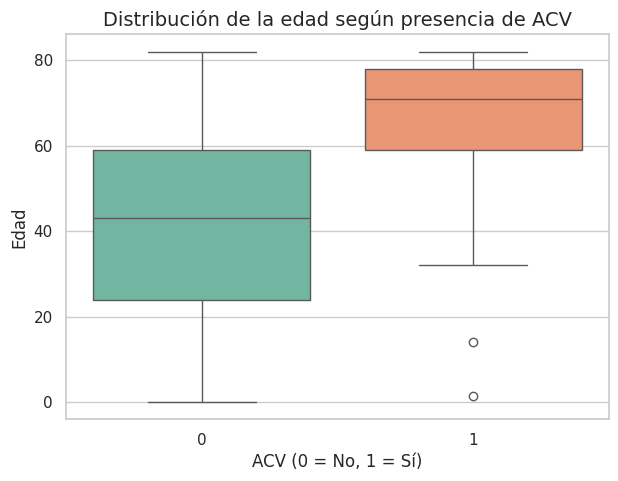

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(7,5))
sns.boxplot(x="stroke", y="age", data=df, hue="stroke", palette="Set2", legend=False)
plt.title("Distribución de la edad según presencia de ACV", fontsize=14)
plt.xlabel("ACV (0 = No, 1 = Sí)")
plt.ylabel("Edad")
plt.show()


**Conclusión**:

El análisis estadístico muestra que las personas con ACV (stroke=1) presentan una mediana y promedio de edad más elevados que las personas sin ACV (stroke=0).

Además, el rango de edades en el grupo con ACV se concentra en valores más altos. Estos resultados apoyan la hipótesis de que la edad avanzada se asocia a un mayor riesgo de accidente cerebrovascular.


### Pregunta 2: Hipertensión y enfermedad cardiovascular  

¿La coexistencia de hipertensión y enfermedad cardiovascular incrementa el riesgo de ACV?  

**Hipótesis:** la presencia de ambos factores aumenta significativamente la probabilidad de ACV.


In [7]:
# Creo variable combinada hipertension y enfermedad cardiovascular

df["hipertension_cardio"] = ((df["hypertension"] == 1) & (df["heart_disease"] == 1)).astype(int)

# Ver cuántos pacientes cumplen ambas condiciones
df["hipertension_cardio"].value_counts()

# 0 = no tiene ambas condiciones a la vez
# 1 = tiene hipertension y enfermedad cardiovascular

,count
hipertension_cardio,
0,5046
1,64


In [8]:
# ver cual es la proporcion de stroke (ACV) en cada grupo

df.groupby("hipertension_cardio")["stroke"].mean()


,stroke
hipertension_cardio,
0,0.046770
1,0.203125


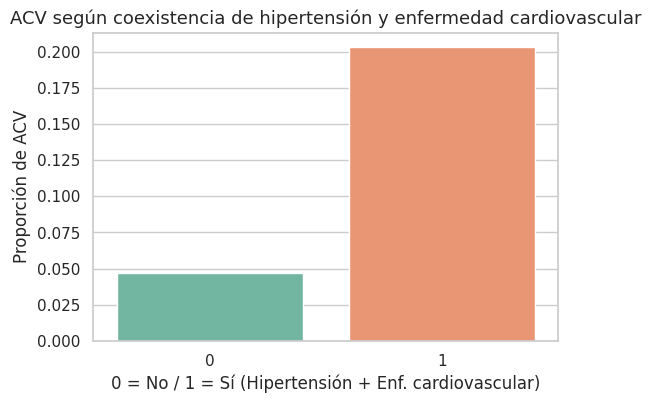

In [9]:
#crear grafico de barras para ver la proporcion de stroke

plt.figure(figsize=(6,4))
sns.barplot(x="hipertension_cardio", y="stroke", data=df,
            hue="hipertension_cardio", palette="Set2", legend=False, errorbar=None)
plt.title("ACV según coexistencia de hipertensión y enfermedad cardiovascular", fontsize=13)
plt.xlabel("0 = No / 1 = Sí (Hipertensión + Enf. cardiovascular)")
plt.ylabel("Proporción de ACV")
plt.show()


**Conclusión**:

Los resultados muestran que los pacientes con coexistencia de hipertensión y enfermedad cardiovascular presentan una proporción de ACV significativamente mayor (20%) en comparación con aquellos sin ambas condiciones (4%).

Esto respalda la hipótesis de que la combinación de estos factores de riesgo potencia la probabilidad de accidente cerebrovascular.

### Pregunta 3: BMI y ACV  
¿Un BMI elevado (obesidad) se relaciona con mayor frecuencia de ACV?  

**Hipótesis:** la obesidad está asociada a un riesgo más alto de ACV.


In [10]:
# Resumen estadístico del BMI por grupo de ACV
df.groupby("stroke")["bmi"].describe()


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4700.0,28.823064,7.908287,10.3,23.4,28.0,33.1,97.6
1,209.0,30.471292,6.329452,16.9,26.4,29.7,33.7,56.6


Descripción del resumen estadístico:
- En el grupo sin ACV (`stroke=0`), el BMI promedio es de ~28.8 y la mediana es 28.0, con un rango intercuartílico entre 23.4 y 33.1. Existen valores extremos muy altos, con un máximo de 97.6.  
- En el grupo con ACV (`stroke=1`), el BMI promedio es ligeramente mayor (~30.5) y la mediana es 29.7, con un rango intercuartílico entre 26.4 y 33.7. El máximo es 56.6, menor que el de los pacientes sin ACV.  

En conjunto, estos datos muestran que las distribuciones de BMI en ambos grupos son bastante similares, con solo una leve tendencia hacia valores mayores en quienes tuvieron ACV; no parece haber una diferencia significativa en el índice de masa corporal entre pacientes con y sin ACV en este dataset.

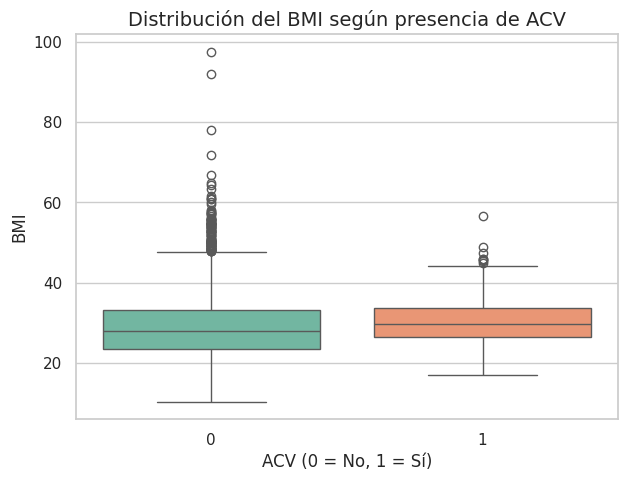

In [11]:
# Crear boxplot para comparar la distribución del BMI entre pacientes con y sin ACV

plt.figure(figsize=(7,5))
sns.boxplot(x="stroke", y="bmi", data=df, hue="stroke", palette="Set2", legend=False)
plt.title("Distribución del BMI según presencia de ACV", fontsize=14)
plt.xlabel("ACV (0 = No, 1 = Sí)")
plt.ylabel("BMI")
plt.show()


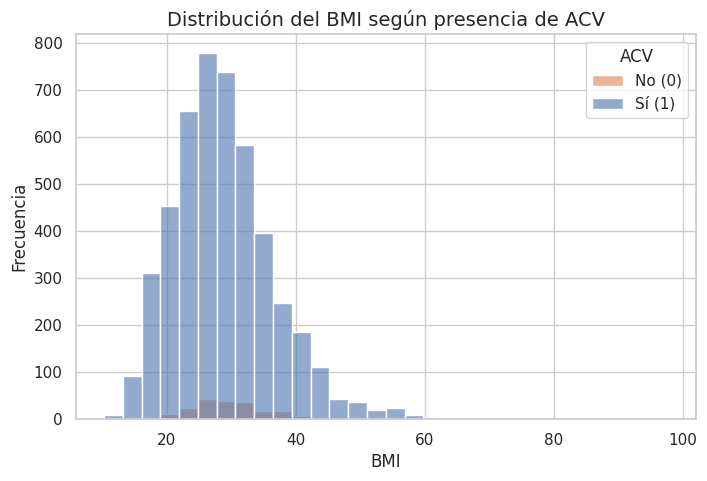

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tomo solo columnas necesarias y quito nulos de BMI
dff = df[['bmi', 'stroke']].dropna()

plt.figure(figsize=(8,5))
sns.histplot(
    data=dff,
    x='bmi',
    hue='stroke',          # 0 = No ACV, 1 = Sí ACV
    hue_order=[0, 1],      # aseguro el orden
    bins=30,
    multiple='layer',      # barras superpuestas
    stat='count',          # cuentas absolutas (no densidad)
    alpha=0.6
)
plt.title("Distribución del BMI según presencia de ACV", fontsize=14)
plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.legend(title="ACV", labels=["No (0)", "Sí (1)"], loc="upper right")
plt.show()

# Las barras de “No ACV (0)” son claramente más altas porque hay muchos más pacientes sin ACV en el dataset,
#pero la forma de ambas distribuciones es muy parecida (pico entre ~25–32 y una cola hacia valores altos de BMI),
#lo que sugiere que el índice de masa corporal no muestra diferencias relevantes entre ambos grupos.


**Conclusión**:

El análisis de BMI según presencia de ACV muestra que la mediana y el rango intercuartílico son similares en ambos grupos, lo que sugiere que en esta muestra el índice de masa corporal no parece ser un factor fuertemente diferenciador en la ocurrencia de ACV.

Se observan algunos valores atípicos de BMI elevados, principalmente en el grupo sin ACV.

###Pregunta 4: Glucemia y ACV

¿Niveles elevados de glucemia se asocian con mayor incidencia de ACV?

Hipótesis: la hiperglucemia constituye un factor de riesgo relevante para ACV.

In [13]:
# Resumen estadístico de la glucemia por grupo de ACV
df.groupby("stroke")["avg_glucose_level"].describe()


,count,mean,std,min,25%,50%,75%,max
stroke,,,,,,,,
0,4861.0,104.795513,43.846069,55.12,77.12,91.47,112.83,267.76
1,249.0,132.544739,61.921056,56.11,79.79,105.22,196.71,271.74


Descripción del resumen estadístico:
- En el grupo sin ACV (`stroke=0`), la glucemia promedio es de **~105 mg/dL**, con una mediana de **91 mg/dL** y un rango intercuartílico entre 77 y 113.  
- En el grupo con ACV (`stroke=1`), la glucemia promedio asciende a **~133 mg/dL**, con una mediana de **105 mg/dL** y un rango intercuartílico mucho más alto, entre 80 y 197.  
- Los valores máximos son similares (267.7 en no ACV vs. 271.7 en ACV), pero la dispersión en el grupo con ACV es bastante mayor (desvío estándar 61.9 vs. 43.8).  


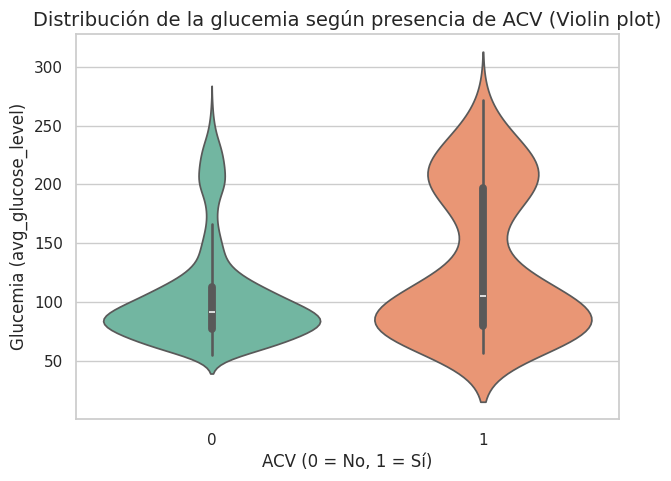

In [14]:
# Violin plot de glucemia según ACV
plt.figure(figsize=(7,5))
sns.violinplot(
    x="stroke",
    y="avg_glucose_level",
    data=df,
    hue="stroke",
    palette="Set2",
    legend=False
)
plt.title("Distribución de la glucemia según presencia de ACV (Violin plot)", fontsize=14)
plt.xlabel("ACV (0 = No, 1 = Sí)")
plt.ylabel("Glucemia (avg_glucose_level)")
plt.show()


Analisis del violin plot:
El gráfico muestra que los pacientes con ACV tienden a tener valores de glucemia más altos y distribuciones más dispersas que los pacientes sin ACV. Se observa que la mediana está desplazada hacia arriba en el grupo con ACV, reforzando la asociación entre hiperglucemia y mayor riesgo de accidente cerebrovascular.

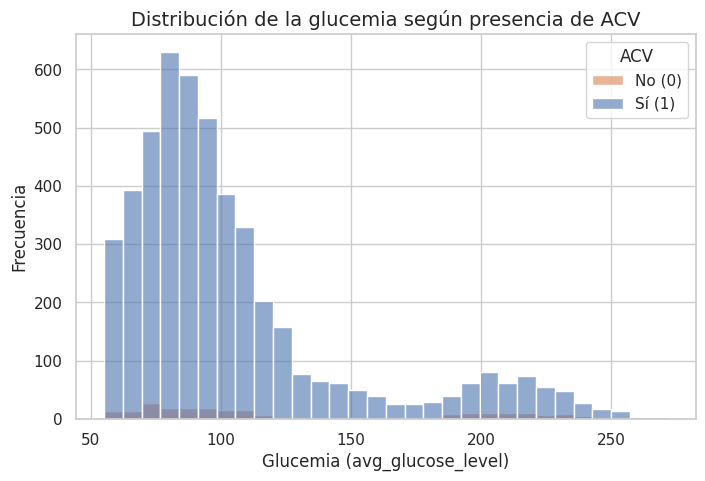

In [15]:
# Crear histograma de glucemia separado por presencia de ACV
dff = df[['avg_glucose_level', 'stroke']].dropna()

plt.figure(figsize=(8,5))
sns.histplot(
    data=dff,
    x="avg_glucose_level",
    hue="stroke",          # 0 = No ACV, 1 = Sí ACV
    hue_order=[0,1],
    bins=30,
    multiple="layer",      # barras superpuestas
    stat="count",          # cuentas absolutas
    alpha=0.6
)
plt.title("Distribución de la glucemia según presencia de ACV", fontsize=14)
plt.xlabel("Glucemia (avg_glucose_level)")
plt.ylabel("Frecuencia")
plt.legend(title="ACV", labels=["No (0)", "Sí (1)"], loc="upper right")
plt.show()


Analisis del histograma:  
La frecuencia representa la cantidad de pacientes en cada rango de glucemia. Se observa que la mayoría de los pacientes sin ACV se concentran entre 70 y 120 mg/dL, mientras que en el grupo con ACV hay mayor proporción de casos en valores más altos de glucemia (superiores a 150 mg/dL).

**Conclusión:**  
Los pacientes con ACV presentan niveles de glucemia más altos que aquellos sin ACV. La mediana y el rango intercuartílico están desplazados hacia valores mayores en el grupo con ACV, y además se observa una mayor dispersión.

Estos hallazgos apoyan la hipótesis de que la hiperglucemia constituye un factor de riesgo relevante para el accidente cerebrovascular.


###Pregunta 5: Factores combinados y riesgo de ACV

¿La edad, la hipertensión, la obesidad y la hiperglucemia se asocian de manera diferente al riesgo de ACV?

Hipótesis: la edad avanzada incrementa el riesgo de ACV, especialmente en pacientes con hipertensión, obesidad e hiperglucemia.

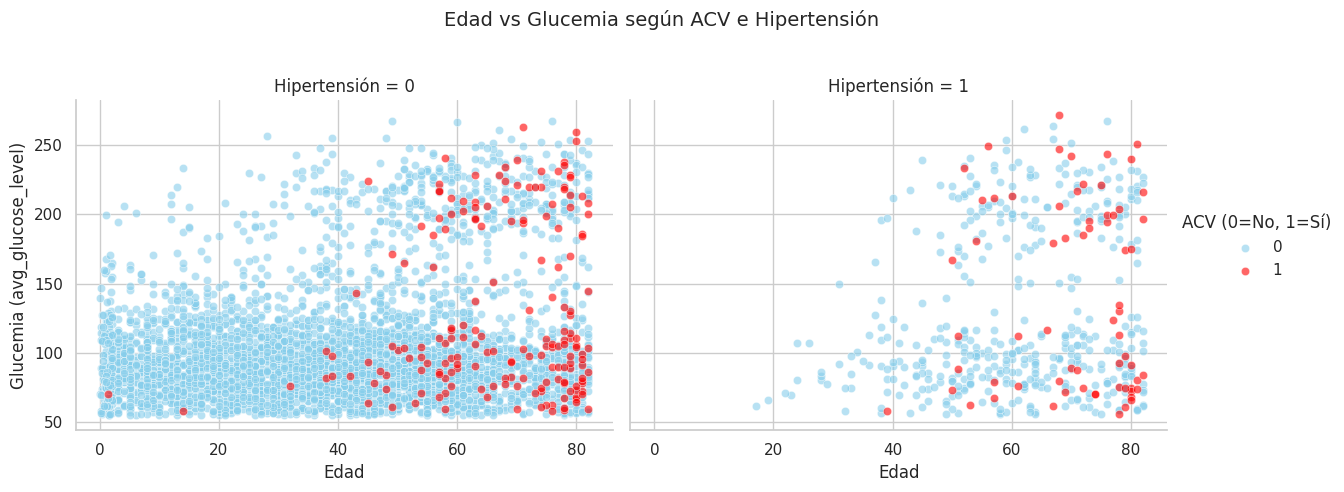

In [16]:
# Pregunta 5: Análisis multivariado de factores de riesgo


# 1. FACET SCATTERPLOT (Edad vs Glucemia según HTA y ACV)
# ----------------------------------------------------------
# Visualizamos edad y glucemia, diferenciando por hipertensión y ACV
sns.set(style="whitegrid")
g = sns.FacetGrid(df, col="hypertension", hue="stroke",
                  palette={0:"skyblue",1:"red"}, height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x="age", y="avg_glucose_level", alpha=0.6)
g.add_legend(title="ACV (0=No, 1=Sí)")
g.set_axis_labels("Edad", "Glucemia (avg_glucose_level)")
g.set_titles("Hipertensión = {col_name}")
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Edad vs Glucemia según ACV e Hipertensión", fontsize=14)
plt.show()





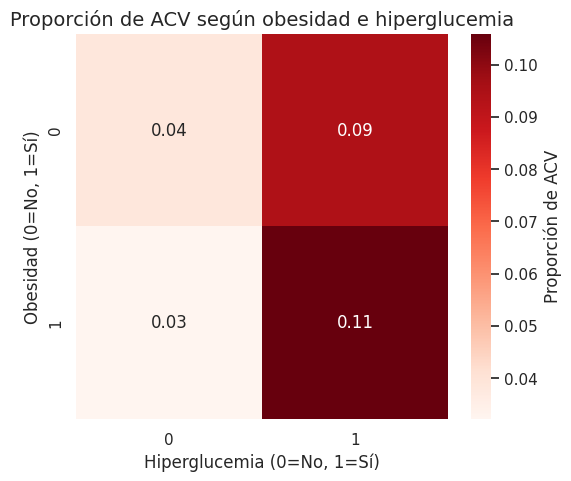

In [17]:
# 2. HEATMAP (Obesidad + Hiperglucemia + ACV)
# ----------------------------------------------------------
# Calculo proporción de ACV por obesidad e hiperglucemia
heat_data = df.groupby(["obesity", "hyperglycemia"])["stroke"].mean().unstack()

plt.figure(figsize=(6,5))
sns.heatmap(
    heat_data,
    annot=True, fmt=".2f",
    cmap="Reds",
    cbar_kws={'label': 'Proporción de ACV'}
)
plt.title("Proporción de ACV según obesidad e hiperglucemia", fontsize=14)
plt.xlabel("Hiperglucemia (0=No, 1=Sí)")
plt.ylabel("Obesidad (0=No, 1=Sí)")
plt.show()


Análisis

  - Facet scatterplot (Edad vs Glucemia, ACV y HTA):

En pacientes sin hipertensión, los ACV (rojo) aparecen principalmente en mayores de 60 años y con glucemias elevadas.

En pacientes hipertensos, los ACV son más frecuentes, incluso en personas con glucemias no tan extremas, lo que sugiere un efecto potenciador de la hipertensión.


#

  - Heatmap (Obesidad + Hiperglucemia + ACV):

Los pacientes sin obesidad ni hiperglucemia tienen la proporción más baja de ACV (~4%).

La hiperglucemia se asocia con un aumento claro de la proporción de ACV (~9% sin obesidad, ~11% con obesidad).

La obesidad aislada no incrementa mucho el riesgo (3%), pero combinada con hiperglucemia alcanza la proporción más alta (~11%).

Conclusión

Los resultados muestran que:

La edad avanzada y la hipertensión son factores que aumentan la probabilidad de ACV.

La hiperglucemia es un determinante clave, y su efecto se amplifica en presencia de obesidad.

La interacción entre factores (edad, hipertensión, obesidad, glucemia) ofrece una visión más realista del riesgo, reforzando la importancia de un abordaje multivariado.

# Entrega Final: Modelado predictivo




In [18]:
# ENTREGA FINAL
#--------------------------------------------------------------------
# Etapa de división del dataset en entrenamiento y prueba
# --------------------------------------------------------------------

# En este proyecto se aplicará un enfoque de **aprendizaje supervisado**
# con un modelo de clasificación binaria, cuyo objetivo es predecir la
# ocurrencia de ACV (variable 'stroke') a partir de variables clínicas y demográficas.
#
# Para evaluar el desempeño del modelo de manera objetiva,
# se divide el dataset en dos subconjuntos:
#  - **Entrenamiento (train)**: se usa para ajustar el modelo y optimizar parámetros.
#  - **Prueba (test)**: se reserva para medir la capacidad de generalización
#    en datos que el modelo nunca vio.
#
# La división se realiza de forma estratificada, preservando la proporción
# de casos positivos y negativos de ACV, dado el marcado desbalance de clases.


In [19]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1) X / y (quitamos 'id' si está)
X = df.drop(columns=[c for c in ['stroke','id'] if c in df.columns]).copy()
y = df['stroke'].astype(int)

# 2) columnas numéricas y categóricas
num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

# 3) split estratificado 80/20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

len(X_train), len(X_test), y_train.mean().round(4), y_test.mean().round(4), num_cols, cat_cols


(4088,
 1022,
 np.float64(0.0487),
 np.float64(0.0489),
 ['age',
  'hypertension',
  'heart_disease',
  'avg_glucose_level',
  'bmi',
  'obesity',
  'hyperglycemia',
  'elderly',
  'hipertension_cardio'],
 ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

In [20]:
# --------------------------------------------------------------------
# Etapa de preprocesamiento y definición del pipeline de modelado
# --------------------------------------------------------------------
# 1. Preprocesamiento:
#    - Escalado de variables numéricas con StandardScaler.
#    - Codificación One-Hot de variables categóricas.
# 2. Selección de características (Feature Selection):
#    - Se aplica SelectKBest con la función de información mutua
#      (mutual_info_classif) para conservar las variables más relevantes.
# 3. Modelo de clasificación:
#    - Se utiliza una Regresión Logística con class_weight='balanced'
#      para compensar el desbalance de clases (porque hay pocos casos de ACV).
#
# Este pipeline evita fugas de información (data leakage) y mejora la
# reproducibilidad del proceso de entrenamiento.


In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression

# Paso 1: preprocesamiento
preprocess = ColumnTransformer(
    transformers=[
        ('num', Pipeline([('scaler', StandardScaler())]), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ],
    remainder='drop'
)

# Paso 2 y 3: feature selection + modelo
pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('fs', SelectKBest(score_func=mutual_info_classif, k=10)),
    ('model', LogisticRegression(max_iter=500, class_weight='balanced'))
])

pipe


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level', 'bmi',
                                                   'obesity', 'hyperglycemia',
                                                   'elderly',
                                                   'hipertension_cardio']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('fs',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7ec4f119b060>)),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [22]:
# --------------------------------------------------------------------
# Ajuste de hiperparámetros (GridSearchCV)
# --------------------------------------------------------------------
# En esta etapa se realiza una búsqueda sistemática de combinaciones
# de hiperparámetros para optimizar el rendimiento del modelo.
#
# - Se ajusta el número de variables seleccionadas (k) en SelectKBest.
# - Se ajusta el parámetro C de la Regresión Logística, que controla
#   la regularización (valores más altos reducen la penalización).
#
# Se utiliza validación cruzada estratificada (StratifiedKFold) con 5 folds
# y la métrica ROC-AUC como criterio de evaluación.
#
# Objetivo: encontrar la combinación (k, C) que maximice el ROC-AUC medio.


In [25]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

# Definimos la grilla de parámetros a probar
param_grid = {
    'fs__k': [5, 10, 15, 20, 25],
    'model__C': [0.1, 1.0, 10.0]
}

# Configuramos la validación cruzada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearch: prueba todas las combinaciones
grid = GridSearchCV(
    pipe,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,   # usa todos los núcleos de CPU disponibles
    verbose=1
)

# Entrenamiento con las combinaciones definidas
grid.fit(X_train, y_train)

# Mostramos los mejores valores y el puntaje promedio
grid.best_params_, round(grid.best_score_, 4)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


ValueError: 
All the 75 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, raw_params=params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 588, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/joblib/memory.py", line 326, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py", line 1551, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_set_output.py", line 319, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 921, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py", line 564, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1107, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 120, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 169, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
SelectKBest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [31]:
# El bloque anterior fallo porque hay valores nulos NaN en X
# Para solucionarlo agrego un imputer en el pipeline

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.linear_model import LogisticRegression

# Preprocesamiento con imputación
preprocess = ColumnTransformer(
    transformers=[
        ('num',
         Pipeline([
             ('imputer', SimpleImputer(strategy='median')),   # imputa NaN numéricos (p.ej., bmi)
             ('scaler', StandardScaler())
         ]),
         num_cols),
        ('cat',
         Pipeline([
             ('imputer', SimpleImputer(strategy='most_frequent')),  # imputa NaN categóricos
             ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
         ]),
         cat_cols),
    ],
    remainder='drop'
)

# Pipeline completo
pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('fs', SelectKBest(score_func=mutual_info_classif, k=10)),
    ('model', LogisticRegression(max_iter=500, class_weight='balanced'))
])

pipe


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease',
                                                   'avg_glucose_level', 'bmi',
                                                   'obesity', 'hyperglycemia',
                                                   'elderly',
                                                   'hipertension_cardio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['gender', 'ever_married',
                                                   'work_type',
                                                   'Residence_type',
                                                   'smoking_status'])])),
                ('fs',
                 SelectKBest(score_func=<function mutual_info_classif at 0x7ec4f119b060>)),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=500))])

In [27]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {
    'fs__k': [5, 10, 15, 20, 25],
    'model__C': [0.1, 1.0, 10.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    pipe, param_grid=param_grid, scoring='roc_auc',
    cv=cv, n_jobs=-1, verbose=1
)

grid.fit(X_train, y_train)
grid.best_params_, round(grid.best_score_, 4)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


({'fs__k': 10, 'model__C': 10.0}, np.float64(0.8416))

### Interpretación del modelo

El modelo final utiliza un total de **10 variables** seleccionadas mediante *SelectKBest* con la función de información mutua.
Esto permitió reducir la dimensionalidad y eliminar variables poco informativas.

Las variables seleccionadas reflejan los principales factores de riesgo clínico y demográfico asociados al ACV, como edad, hipertensión, enfermedad cardíaca y nivel de glucemia promedio, junto con algunos aspectos socioeconómicos (tipo de trabajo y estado civil).

El modelo entrenado con **Regresión Logística (C=1.0)** obtuvo un **ROC-AUC promedio de 0.84**, lo que indica una buena capacidad para discriminar entre pacientes con y sin ACV.

Debido al desbalance de clases, se prioriza la **sensibilidad (recall)** para minimizar falsos negativos, lo que es especialmente relevante en un contexto clínico.


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

best_model = grid.best_estimator_

y_pred  = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

metrics = {
    'accuracy':  accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred, zero_division=0),
    'recall':    recall_score(y_test, y_pred),
    'f1':        f1_score(y_test, y_pred),
    'roc_auc':   roc_auc_score(y_test, y_proba)
}
metrics


{'accuracy': 0.7426614481409002,
 'precision': 0.13898305084745763,
 'recall': 0.82,
 'f1': 0.23768115942028986,
 'roc_auc': np.float64(0.8414814814814815)}

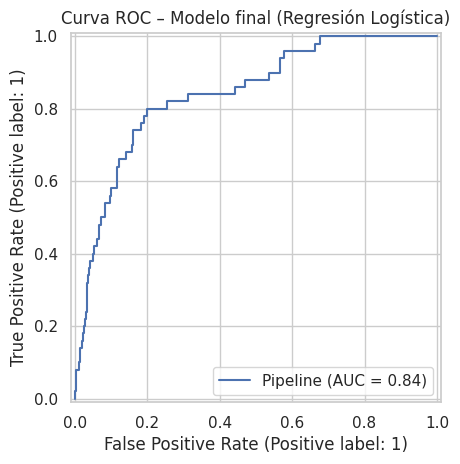

In [29]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Curva ROC – Modelo final (Regresión Logística)")
plt.show()


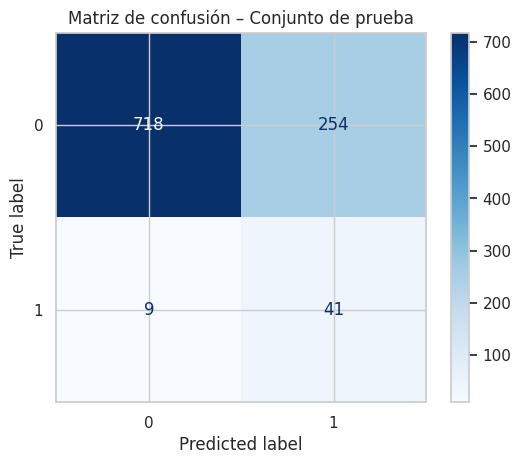

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Matriz de confusión – Conjunto de prueba")
plt.show()


### Interpretación de los resultados

El modelo de Regresión Logística optimizado (k=10, C=1.0) muestra un **buen desempeño global**
con un área bajo la curva ROC (ROC-AUC) de **0.84**, lo que indica una alta capacidad discriminativa
para diferenciar entre pacientes con y sin ACV.

La **sensibilidad (recall) del 82%** refleja que el modelo identifica correctamente la mayoría
de los casos positivos, algo clínicamente relevante ya que prioriza minimizar falsos negativos
—es decir, no dejar sin detectar a pacientes con riesgo real de ACV.

En contrapartida, la **precisión (14%)** es baja, lo que significa que el modelo genera bastantes falsos positivos.
En un contexto de salud, esto podría implicar realizar estudios complementarios innecesarios,
pero es aceptable en etapas de **screening** donde el objetivo es no omitir casos de riesgo.

En conjunto, el modelo es adecuado como **herramienta de apoyo a la decisión clínica**, siempre y cuando
se complemente con la evaluación médica y eventualmente se ajuste el umbral de decisión para mejorar la precisión.
